In [7]:
import pytesseract
from transformers import pipeline
from PIL import Image

# Load the document question answering pipeline
doc_qa = pipeline("document-question-answering", model="impira/layoutlm-document-qa")

# Function to answer a question about an invoice
def answer_invoice_question(image_path, question):
    # Get answer using the pipeline
    result = doc_qa(image_path, question)

    # The pipeline returns a list of answers with scores
    if result:
        # Return the highest-scoring answer
        return result[0]["answer"]
    else:
        return "No answer found"

# Test the function
image_path = "/content/Screenshot 2025-04-04 143415.png"  # Your image path
question = "What is the invoice number?"

answer = answer_invoice_question(image_path, question)
print(f"Question: {question}")
print(f"Answer: {answer}")

Device set to use cuda:0


Question: What is the invoice number?
Answer: 9¥4MB4-752


# 1. Install the requirements

In [25]:
%%capture
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!apt-get update && apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install datasets

# 2. Test on specific one image

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


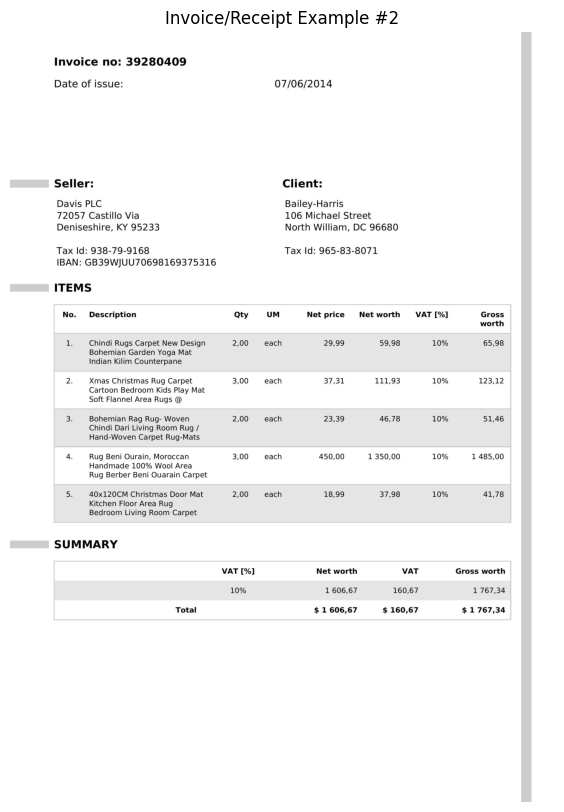

Results:
--------------------------------------------------
Question: What is the invoice number?
Answer: 39280409 (confidence: 1.00)

Question: What is the Tax Id?
Answer: 938-79-9168 (confidence: 0.74)

Question: What is the Date of invoice?
Answer: 07/06/2014 (confidence: 1.00)

Question: What is the name of seller?
Answer: Davis PLC (confidence: 1.00)

Question: What is the name of client?
Answer: Bailey-Harris (confidence: 1.00)

Question: what is the Gross worth?
Answer: 1 767,34 (confidence: 0.41)

Question: What is the Net worth?
Answer: 1 606,67 (confidence: 0.98)

Question: What is the VAT?
Answer: 160,67 $ 160,67 (confidence: 0.08)



In [2]:
from transformers import pipeline
from PIL import Image
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("mychen76/invoices-and-receipts_ocr_v1")

# Load the document question answering pipeline
doc_qa = pipeline("document-question-answering", model="impira/layoutlm-document-qa")

# Select example index
example_idx = 2  # Example in the dataset

# Get example from dataset
example = dataset['train'][example_idx]

# Extract image
image = example['image']

# Display the image only once
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title(f"Invoice/Receipt Example #{example_idx}")
plt.show()

# List of questions to ask about the image
questions = [
    "What is the invoice number?",
    "What is the Tax Id?",
    "What is the Date of invoice?",
    "What is the name of seller?",
    "What is the name of client?",
    "what is the Gross worth?",
    "What is the Net worth?",
    "What is the VAT?",
]

# Process all questions on the same image
print("Results:")
print("-" * 50)

for question in questions:
    # Get answer using the pipeline directly with the image
    result = doc_qa(image, question)

    # Extract answer and confidence
    if result:
        answer = result[0]["answer"]
        confidence = result[0]["score"]
    else:
        answer = "No answer found"
        confidence = 0.0

    # Print results
    print(f"Question: {question}")
    print(f"Answer: {answer} (confidence: {confidence:.2f})")
    print()

# 3. Save the first 50 images from dataset

In [3]:
from datasets import load_dataset
from PIL import Image
import os
import warnings

# Ignore authentication warnings
warnings.filterwarnings("ignore")

# Load the dataset
dataset = load_dataset("mychen76/invoices-and-receipts_ocr_v1")

# Create a directory to save the images
save_dir = "invoice_images"
os.makedirs(save_dir, exist_ok=True)

# Determine how many images to save (first 100 or all if less than 100)
num_images = min(50, len(dataset['train']))

# Save the first 100 images
for idx in range(num_images):
    # Get example from dataset
    example = dataset['train'][idx]

    # Extract image
    img = example['image']

    # Convert to PIL Image if needed
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)

    # Save the image
    save_path = os.path.join(save_dir, f"invoice_{idx}.png")
    img.save(save_path)

    # Print progress every 10 images
    if (idx + 1) % 10 == 0:
        print(f"Saved {idx + 1}/{num_images} images")

print(f"Successfully saved {num_images} images to {save_dir} directory")

Saved 10/50 images
Saved 20/50 images
Saved 30/50 images
Saved 40/50 images
Saved 50/50 images
Successfully saved 50 images to invoice_images directory


# 4. Create the path list

In [4]:
# prompt: create list of all the image path in this folder "/content/invoice_images"

import os

def get_image_paths(folder_path):
  """
  Returns a list of all image paths in the given folder.

  Args:
    folder_path: The path to the folder containing the images.

  Returns:
    A list of strings, where each string is the full path to an image file.
    Returns an empty list if the folder does not exist or contains no images.
  """
  image_paths = []
  if os.path.exists(folder_path):
    for filename in os.listdir(folder_path):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        image_paths.append(os.path.join(folder_path, filename))
  return image_paths

# Example usage (replace with your actual folder path):
image_folder = "/content/invoice_images"
all_image_paths = get_image_paths(image_folder)


# 5. Extract the data from image and make the pandas dataframe

In [5]:
# prompt: i also want to add image name column in it, from image path

import pandas as pd
def get_image_paths(folder_path):
  """
  Returns a list of all image paths in the given folder.

  Args:
    folder_path: The path to the folder containing the images.

  Returns:
    A list of strings, where each string is the full path to an image file.
    Returns an empty list if the folder does not exist or contains no images.
  """
  image_paths = []
  if os.path.exists(folder_path):
    for filename in os.listdir(folder_path):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        image_paths.append(os.path.join(folder_path, filename))
  return image_paths

# Example usage (replace with your actual folder path):
image_folder = "/content/invoice_images"
all_image_paths = get_image_paths(image_folder)

# Create a DataFrame with only column names
df = pd.DataFrame(columns=["Image_name",'Invoice number', 'Tax ID', 'Date of invoice', 'Seller', 'Client', 'Gross worth', 'Net worth', 'VAT'])

for idx, image_path in enumerate(all_image_paths):
  image_name = os.path.basename(image_path) # Extract image name from path
  questions = [
      "What is the invoice number?",
      "What is the Tax Id?",
      "What is the Date of invoice?",
      "What is the name of seller?",
      "What is the name of client?",
      "what is the Gross worth?",
      "What is the Net worth?",
      "What is the VAT?",
  ]
  answers = []
  for question in questions:
      result = doc_qa(image_path, question)
      if result:
          answer = result[0]["answer"]
      else:
          answer = None
      answers.append(answer)

  # Insert image name at the beginning of the answers list
  answers.insert(0, image_name)

  df.loc[len(df)] = answers
  print(f"Processed image {idx + 1}/{len(all_image_paths)}")
df


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processed image 1/50
Processed image 2/50
Processed image 3/50
Processed image 4/50
Processed image 5/50
Processed image 6/50
Processed image 7/50
Processed image 8/50
Processed image 9/50
Processed image 10/50
Processed image 11/50
Processed image 12/50
Processed image 13/50
Processed image 14/50
Processed image 15/50
Processed image 16/50
Processed image 17/50
Processed image 18/50
Processed image 19/50
Processed image 20/50
Processed image 21/50
Processed image 22/50
Processed image 23/50
Processed image 24/50
Processed image 25/50
Processed image 26/50
Processed image 27/50
Processed image 28/50
Processed image 29/50
Processed image 30/50
Processed image 31/50
Processed image 32/50
Processed image 33/50
Processed image 34/50
Processed image 35/50
Processed image 36/50
Processed image 37/50
Processed image 38/50
Processed image 39/50
Processed image 40/50
Processed image 41/50
Processed image 42/50
Processed image 43/50
Processed image 44/50
Processed image 45/50
Processed image 46/

,Image_name,Invoice number,Tax ID,Date of invoice,Seller,Client,Gross worth,Net worth,VAT
0,invoice_13.png,87278875,954-98-4076,07/06/2019,Jackson-Martinez,"Foster, Travis and Harris","75,61","68,74",954-98-4076
1,invoice_1.png,61356291,949-84-9105,09/06/2012,"Chapman, Kim and Green",Rodriguez-Stevens,"212,09","192,81","19,28"
2,invoice_2.png,39280409,938-79-9168,07/06/2014,Davis PLC,Bailey-Harris,"1 767,34","1 606,67","160,67 $ 160,67"
3,invoice_12.png,19537372,926-86-4853,07/28/2012,Richardson LLC,Rodriguez Ltd,"016,84","819,98",10%
4,invoice_35.png,76999802,962-85-6776,07/14/2020,"Nolan, Williams and Roach","Dixon, Hall and Payne","81 661,14","237,40","423,74"
5,invoice_7.png,99763738,928-86-2361,06/14/2017,Wheeler-Dawson,"Franklin, Alexander and Ford","403,25","366,59","36,66"
6,invoice_25.png,19961329,935-96-4412,02/24/2015,Martin Group,Cox-Hall,"40,69","3,70",10%
7,invoice_45.png,19512841,971-74-5288,06/18/2012,Camacho-Stewart,Fleming Ltd,"102,90","100,26",10%
8,invoice_34.png,72744145,953-92-2203,03/29/2016,"Elliott, Simon and Taylor","Hopkins, Graves and Baker","3 085,50","2 805,00","280,50"
9,invoice_29.png,81432357,930-70-8573,07/30/2020,Tran LLC,"Golden, Gross and Rivera","1 155,00","368,88","936,89"
